# Importing Numpy, Pandas, Matplotlib

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Input Parameters

In [116]:
class Real_engine:
    '''
    PR = Compressor Pressure ratio (only integer numbers)
    Ec = Compressor isentropic efficiency 
    Et = Turbine isentropic efficiency
    Em = Mechanical efficiency
    T1 = Ambient temperature (kelvin)
    T3 = Turbine inlet temperature (kelvin)
    P1 = Ambient pressure (Pascal)
    cp = Specific heat at constant pressure (J/kg*k)
    R  = Specific gas constant (J/Kg*k) 
    ccpl = Combustion Chamber Pressure losses
    '''
    pr = np.linspace(1,50,50)
    
    def __init__(self,PR,Ec,Et,Em,T1,T3,P1,cp,ccpl,R=287):
        self.T3 = T3
        self.T1 = T1
        self.P1 = P1
        self.cp = cp
        self.PR = PR
        self.R  = R
        self.Ec = Ec
        self.Et = Et
        self.Em = Em
        self.ccpl = ccpl
    
    def calculation(self):
        self.k  = self.cp/(self.cp-self.R)
        self.T2_ideal = self.T1*self.pr**((self.k-1)/self.k)
        self.T2 = ((self.T2_ideal-self.T1)/self.Ec)+self.T1
        self.P2 = self.P1*self.pr
        self.W2 = self.cp*(self.T2-self.T1)/self.Em
        self.P3 = self.P2*self.ccpl
        self.T4_ideal = self.T3*(self.P1/self.P3)**((self.k-1)/self.k)
        self.T4 = self.T3-(self.T3-self.T4_ideal)*self.Et
        self.W3 = self.cp*(self.T3-self.T4)
        self.WT = self.W3-self.W2
        self.Q  = self.cp*(self.T3-self.T2)
        self.ef = self.WT/self.Q*100
        #--------------------------------------------------------------------------------------
        self.t2_ideal = self.T1*(self.PR)**((self.k-1)/self.k)
        self.t2 =((self.t2_ideal-self.T1)/self.Ec)+self.T1
        self.p2 = self.P1*self.PR
        self.p3 = self.p2*self.ccpl
        self.t4_ideal = self.T3*(self.P1/self.p3)**((self.k-1)/self.k)
        self.t4 = self.T3-(self.T3-self.t4_ideal)*self.Et
        self.v1 = (self.R*self.T1)/self.P1
        self.v2 = (self.R*self.t2)/self.p2
        self.v3 = (self.R*self.T3)/self.p2
        self.v4 = (self.R*self.t4)/self.P1

    def data(self):
        data=pd.DataFrame({'Pressure Ratio':self.pr,"P2 (Pa)":self.P2,"T2 (K)":self.T2,"P3 (Pa)":self.P3,"T3 (K)":self.T3,"Net Power (MW)":self.WT/1000000,"Thermal Efficiency":self.ef})
        self.power=data[data['Pressure Ratio']==self.PR]['Net Power (MW)']
        self.efficiency=data[data['Pressure Ratio']==self.PR]['Thermal Efficiency']
        return data        

    def graphs(self):
        
        # NET POWER AND EFFICIENCY
        fig, axes = plt.subplots(2,2,figsize=(15,20))
        #--------------------------------------------------------------------------------------
        x= self.pr
        y_pow= self.WT/1000000
        y_ef=self.ef
        # NET POWER ---------------------------------------------------------------------------
        axes[0,0].plot(x,y_pow,color='k')
        axes[0,0].plot(self.PR,self.power,marker='o')
        axes[0,0].set_xlabel('Pressure Ratio')
        axes[0,0].set_ylabel("Net Power (MW)")
        axes[0,0].grid(True)
        # EFFICIENCY PLOT ---------------------------------------------------------------------
        axes[1,0].plot(x,y_ef,color='k')
        axes[1,0].plot(self.PR,self.efficiency,marker='o')
        axes[1,0].set_xlabel('Pressure Ratio')
        axes[1,0].set_ylabel('Thermal Efficiency')
        axes[1,0].grid(True)
    
        # T-S DIAGRAM--------------------------------------------------------------------------
        self.s1=self.cp*np.log(self.t2/self.T1)-self.R*np.log(self.p2/self.P1)
        self.s2=self.cp*np.log(self.T3/self.t2)-self.R*np.log(self.p3/self.p2)+self.s1
        #self.s3=self.cp*np.log(self.T3/self.t4)-self.R*np.log(self.p3/self.P1)+self.s2
        t3_fake=self.T1*(self.p3/self.P1)**((self.k-1)/self.k)
        
        x12 = np.array([0,self.s1])
        p12 = np.array([self.T1,self.t2])
        
        x231 = np.linspace(self.s1,self.s1+(self.s2-self.s1)/2,20)
        p231 = self.t2*np.exp((x231-self.s1)/self.cp)
        
        #x232 = np.linspace(self.s1,self.s1+(self.s2-self.s1)/2,20)
        x232 = np.linspace(self.s1+(self.s2-self.s1)/2,self.s2,20)
        p232 = t3_fake*np.exp((x232)/self.cp)
        
        axes[0,1].plot(x12,p12,color='b')
        axes[0,1].plot(x231,p231,color='b')  
        axes[0,1].plot(x232,p232,color='b')  
        axes[0,1].grid(True)
        
        
        # ISOBARIC LINES ----------------------------------------------------------------------
        
        cp_line1 = self.T1*np.exp(x231/self.cp)
        cp_line2 = (self.T1+(self.t2-self.T1)/3)*np.exp(x231/self.cp)
        cp_line3 = (self.T1+2*(self.t2-self.T1)/3)*np.exp(x231/self.cp)
        cp_line4 = self.t2*np.exp(x231/self.cp)
        
        
        axes[0,1].plot(x231,cp_line1,marker='_',color='k',alpha=0.5)
        axes[0,1].plot(x231,cp_line2,marker='_',color='k',alpha=0.5)
        axes[0,1].plot(x231,cp_line3,marker='_',color='k',alpha=0.5)
        axes[0,1].plot(x231,cp_line4,marker='_',color='k',alpha=0.5)
        
        return (p12,p231)   
        
        
        
        
        
        

In [123]:
engine=Real_engine(20,0.97,0.98,0.99,298,1200,101325,1004.5,0.95)
engine.calculation()
engine.data().head(20)

,Pressure Ratio,P2 (Pa),T2 (K),P3 (Pa),T3 (K),Net Power (MW),Thermal Efficiency
0,1.0,101325.0,298.000000,96258.75,1200,-0.017440,-1.924773
1,2.0,202650.0,365.284607,192517.50,1200,0.129660,15.463852
2,3.0,303975.0,411.282429,288776.25,1200,0.190557,24.052143
3,4.0,405300.0,447.305462,385035.00,1200,0.223113,29.509142
4,5.0,506625.0,477.359014,481293.75,1200,0.242445,33.399533
5,6.0,607950.0,503.377434,577552.50,1200,0.254462,36.364369
6,7.0,709275.0,526.458178,673811.25,1200,0.261999,38.724488
7,8.0,810600.0,547.290004,770070.00,1200,0.266597,40.661700
8,9.0,911925.0,566.336406,866328.75,1200,0.269171,42.288222
9,10.0,1013250.0,583.925694,962587.50,1200,0.270299,43.677787


(array([298.        , 713.83193228]),
 array([713.83193228, 723.93557337, 734.18222231, 744.57390324,
        755.11266895, 765.80060129, 776.63981159, 787.63244103,
        798.78066114, 810.08667416, 821.55271349, 833.18104418,
        844.9739633 , 856.93380045, 869.0629182 , 881.36371258,
        893.8386135 , 906.49008529, 919.32062714, 932.33277363]))

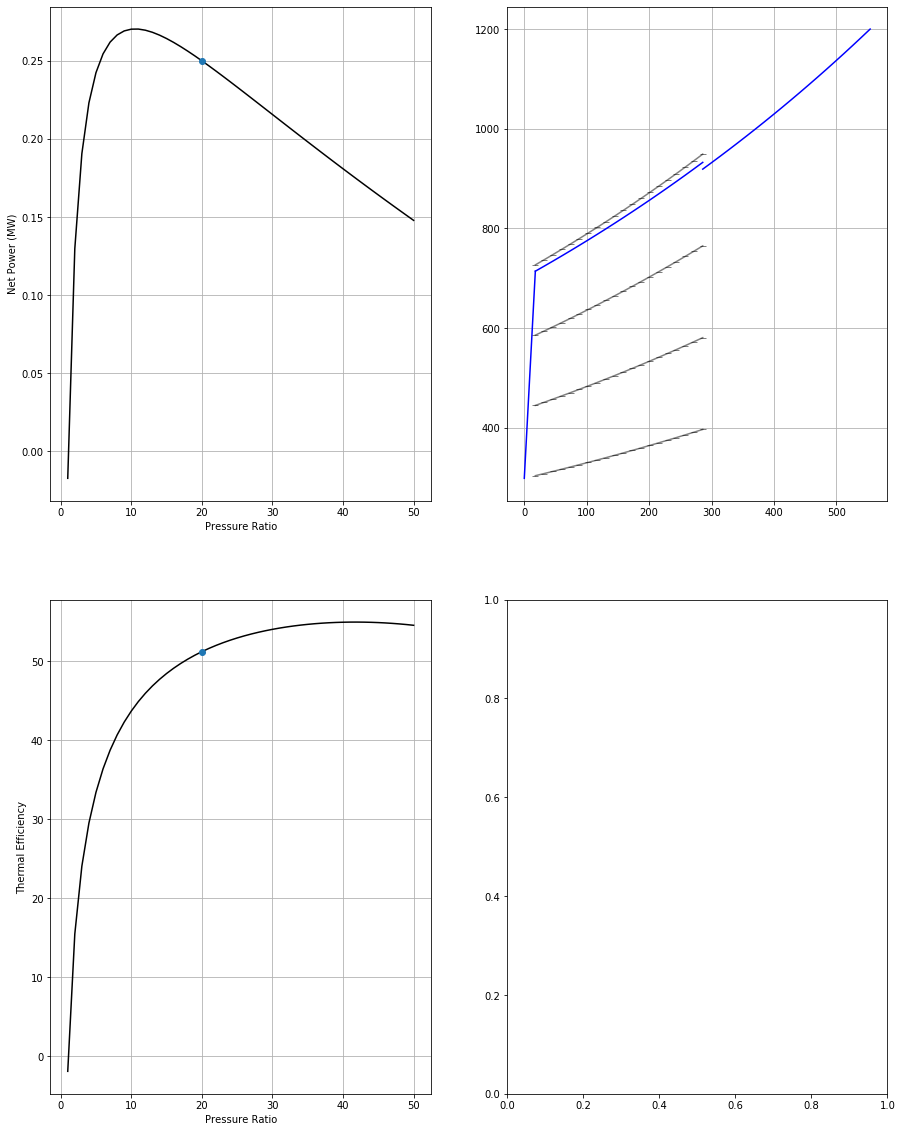

In [124]:
engine.graphs()